Isolation Forest is an anomaly detection algorithm created by Fei Tony Liu et al. They argue that most of the existing approaches to anomaly detection find the norm first, then identify observations that do not conform to the norm. They propose the Isolation Forest as an alternative approach — explicitly isolating anomalies instead of profiling normal data points. Anomalies are isolated closer to the root of the tree; whereas normal points are isolated at the deeper end of the tree. They call each tree the Isolation Tree or iTree. This isolation characteristic of tree forms the basis to detect anomalies.

**Why “Forest”?**

You probably hear Random Forests more often than Isolated Forests. So let me borrow random forests to explain. The “forest” in a random forest refers to the ensembling learning that constructs a multitude of trees like a forest. Why is this needed? The short answer is to improve accuracy and overcome overfitting. The drawback of a single decision tree is that it can fit the data too well — overfitting, thus loses the accuracy. The solution is to build many trees. This will result in a great improvement in accuracy.

The Isolated Forest gets the arithmetic mean of the predicted anomaly scores of all the trees.


Step 1–2–3 guide to help you handle an anomaly detection project successfully: Once you complete the modeling step, you will determine a reasonable boundary and perform the summary statistics to show the data evidences why those data points are viewed as outliers.


Do not miss this wonderful Python Outlier Detection (PyOD) Toolkit. PyOD is a comprehensive module that has been featured in the data science community such as Towards Data Science, Analytics Vidhya, KDnuggets, etc. If you are either a data scientist specialized in anomaly detection, or a professional in the Special Investigation Unit (SIU), or plan to advance modeling in anomaly detection, I advise you to read on to explore the benefits of PyOD.

# Build the Model


In [2]:
import numpy as np
import pandas as pd
from pyod.models.iforest import IForest
from sklearn.model_selection import train_test_split

In [3]:
# import the tidy data from the Step #2
df=pd.read_csv('step2-output-cleaned.csv')

In [4]:
df.head()

,date,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [5]:
df.shape

(219521, 53)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219521 entries, 0 to 219520
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            219521 non-null  object 
 1   sensor_00       219521 non-null  float64
 2   sensor_01       219521 non-null  float64
 3   sensor_02       219521 non-null  float64
 4   sensor_03       219521 non-null  float64
 5   sensor_04       219521 non-null  float64
 6   sensor_05       219521 non-null  float64
 7   sensor_06       219521 non-null  float64
 8   sensor_07       219521 non-null  float64
 9   sensor_08       219521 non-null  float64
 10  sensor_09       219521 non-null  float64
 11  sensor_10       219521 non-null  float64
 12  sensor_11       219521 non-null  float64
 13  sensor_12       219521 non-null  float64
 14  sensor_13       219521 non-null  float64
 15  sensor_14       219521 non-null  float64
 16  sensor_16       219521 non-null  float64
 17  sensor_17 

In [7]:
# Let's convert the data type of timestamp column to datatime format
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sensor_00,219521.0,2.371961,0.403223,0.000000,2.417187,2.455556,2.499826,2.549016
sensor_01,219521.0,47.590015,3.299447,0.000000,46.310760,48.133678,49.479160,56.727430
sensor_02,219521.0,50.863387,3.668355,33.159720,50.390620,51.649300,52.777770,56.032990
sensor_03,219521.0,43.746718,2.417856,31.640620,42.838539,44.227428,45.225693,48.220490
sensor_04,219521.0,590.629672,144.127709,2.798032,626.620400,632.754600,637.615723,800.000000
sensor_05,219521.0,73.397642,17.304487,0.000000,69.982320,75.578420,80.918750,99.999880
sensor_06,219521.0,13.500351,2.143252,0.014468,13.346350,13.628470,14.539930,22.251160
sensor_07,219521.0,15.841237,2.176726,0.000000,15.856480,16.167530,16.427950,23.596640
sensor_08,219521.0,15.198273,2.015901,0.028935,15.183740,15.451390,15.697340,24.348960
sensor_09,219521.0,14.796988,2.072470,0.000000,15.010130,15.082470,15.118630,25.000000


In [9]:
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
date,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [10]:
df2 = df.drop(['machine_status'], axis=1)
names=df2.columns
X = df[names]
y = df.drop(df2.columns, axis=1)

In [14]:
y.head()

,machine_status
date,
2018-04-01 00:00:00,NORMAL
2018-04-01 00:01:00,NORMAL
2018-04-01 00:02:00,NORMAL
2018-04-01 00:03:00,NORMAL
2018-04-01 00:04:00,NORMAL


**Standardize the variables before modeling. The code below first standardizes the variables, then create the train and test datasets.**

In [11]:
#When you do unsupervised learning, it is always a safe step to standardize the predictors
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

# Training and Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

To give you a good sense of what the data look like, I apply the Principal Component Analysis (PCA) to reduce to two dimensions and plot accordingly.

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

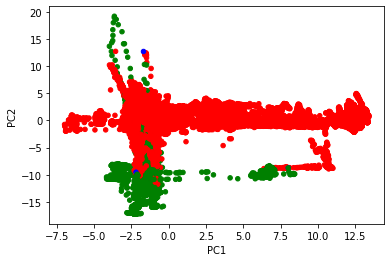

In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
x_pca = pca.fit_transform(X)
x_pca = pd.DataFrame(x_pca)
x_pca.columns=['PC1','PC2']
x_pca.head()

y_color = np.where(y['machine_status']=='NORMAL','red',
            np.where(y['machine_status']=='BROKEN','blue','green'))
x_pca.plot(kind='scatter', x='PC1', y='PC2',c=y_color)

**Model specification:** 
The hyper-parameter testing deserves a special article. Because the goal of this article is to walk you through the entire process, I will just build three plain-vanilla models. The total number of records in the iris dataset is 100 records, so I set the following parameters:

* Model 1: max_samples = 100
* Model 2: max_samples = 80
* Model 3: max_samples = 60

I purposely repeat the same procedure for Model 1, 2, and 3. Feel free to skim through Model 2 and 3 if you get a good understanding from Model 1.

#### Model 1 — Step 1 — Build Your Model
You may notice that I specify behaviour=”new” in the function `IForest()` below. This is required by the function `isolationForest()` of sklearn.ensemble, which the PyOD module calls for.

In [19]:
clf1 = IForest(behaviour="new") 
clf1.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

#### Model 1 — Step 2 — Determine the Cut Point
I apply the trained model Clf1 to predict the anomaly score for each observation in the test data. How do we define an outlier? An outlier is a point that is distant from other points, so the outlier score is defined by distance. The PyOD function .decision_function() calculates the distance or the anomaly score for each data point.

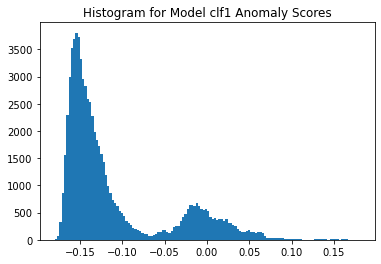

In [22]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
# We apply the model to the test data X_test to get the outlier scores.
y_test_scores = clf1.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

import matplotlib.pyplot as plt
plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf1 Anomaly Scores")
plt.show()

If we use a histogram to count the frequency by the anomaly score, we will see the high scores corresponds to low frequency — the evidence of outliers.

#### Model 1 — Step 3 — Get the Summary Statistics by Cluster
I assign the observations with less than 0.05 anomaly scores to Cluster 0, and to Cluster 1 for those above 0.05(see how I use np.where() in the code). I calculate the summary statistics by cluster using .groupby().


In [25]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.05, 0, 1)
X_test_cluster['cluster'].value_counts()

1    49148
0    23294
Name: cluster, dtype: int64

The following output shows the mean variable values in each cluster. The values of Cluster ‘1’ (the abnormal cluster) is quite different from those of Cluster ‘0’ (the normal cluster). The “score” values show the average distance of those observations to others. A high “score” means that observation is far away from the norm.


You may ask why we produce only two clusters? Obviously if we set several cut points we can get several clusters. But our job is to find the outliers. We can “lump” all the normal clusters into one cluster and label it Cluster “0”.

In [24]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,distance
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.050295,-0.004894,0.105552,-0.061203,-0.01530,-0.097026,-0.355864,-0.141223,-0.113072,-0.144628,...,0.008982,-0.150431,-0.011501,-0.200142,-0.213066,-0.410489,-0.124127,0.170845,-0.187358,-0.113519
1,0.027632,0.005413,-0.048408,0.030686,0.00865,0.050925,0.174336,0.074867,0.062357,0.074140,...,-0.001286,0.070430,0.001770,0.093216,0.103752,0.196411,0.055829,-0.076334,0.093352,0.076470


Don’t you love the Step 1–2–3 instruction to find anomalies? If you feel good about the three-step process, you can skim through Model 2 and 3.

#### Model 2 — Step 1, 2 — Build the Model & Determine the Cut Point

In [26]:
clf2 = IForest(behaviour="new", max_samples=80) 
clf2.fit(X_train)

IForest(behaviour='new', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples=80, n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

Again, let’s use a histogram to count the frequency by the anomaly score.


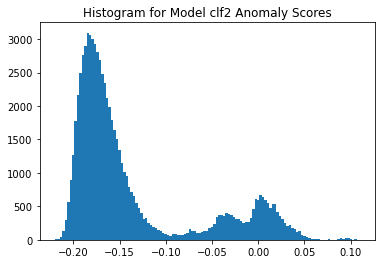

In [27]:
# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf2.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf2 Anomaly Scores")
plt.show()

#### Model 2 — Step 3 — Get the Summary Statistics by Cluster
I assign those observations with less than 0.04 anomaly scores to Cluster 0, and to Cluster 1 for those above 0.04.

In [32]:
X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.06, 0, 1)
X_test_cluster['cluster'].value_counts()

1    48847
0    23595
Name: cluster, dtype: int64

The summary statistic of Cluster ‘1’ (the abnormal cluster) is different from those of Cluster ‘0’ (the normal cluster). The observations in Cluster 1 are outliers.

In [29]:
X_test_cluster.groupby('cluster').mean()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,distance
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.051457,-0.00561,0.105265,-0.061841,-0.015771,-0.097772,-0.356514,-0.142045,-0.114334,-0.144298,...,0.009395,-0.149954,-0.011983,-0.199788,-0.211461,-0.411068,-0.124279,0.169876,-0.187620,-0.137742
1,0.028661,0.00582,-0.049193,0.031545,0.009021,0.052173,0.177829,0.076560,0.064019,0.075292,...,-0.001547,0.071524,0.002083,0.094804,0.104877,0.200330,0.056982,-0.077349,0.095162,0.057029


#### Model 3 — Step 1,2,3


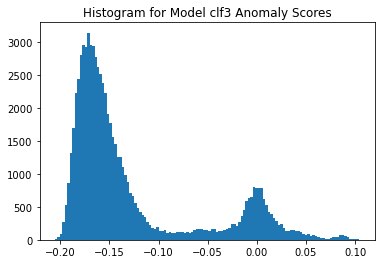

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,distance
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.051231,-0.005476,0.105579,-0.061781,-0.015626,-0.097982,-0.356484,-0.142182,-0.114669,-0.144843,...,0.009537,-0.149725,-0.011657,-0.199719,-0.211912,-0.410706,-0.123757,0.170515,-0.187536,-0.129058
1,0.028565,0.005757,-0.049370,0.031531,0.008956,0.052298,0.177903,0.076662,0.064210,0.075592,...,-0.001617,0.071450,0.001928,0.094819,0.105147,0.200255,0.056759,-0.077698,0.095167,0.080765


In [31]:
clf3 = IForest(behaviour="new", max_samples=60) 
clf3.fit(X_train)

# clf.decision_function: Predict raw anomaly score of X using the fitted detector.
y_test_scores = clf3.decision_function(X_test)  # outlier scores
y_test_scores = pd.Series(y_test_scores)
y_test_scores.head()

plt.hist(y_test_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Model clf3 Anomaly Scores")
plt.show()

X_test_cluster = X_test.copy()
X_test_cluster['distance'] = y_test_scores
X_test_cluster['cluster'] = np.where(X_test_cluster['distance']<0.06, 0, 1)
X_test_cluster['cluster'].value_counts()

X_test_cluster.groupby('cluster').mean()

Like Module 1 and 2, the summary statistic of Cluster ‘1’ (the abnormal cluster) is different from those of Cluster ‘0’ (the normal cluster). The observations in Cluster 1 are outliers.

## Aggregate to Achieve Model Stability
You may wonder why I go with a great length to produce the three models. Here let me reveal the reason: Although unsupervised techniques are powerful in detecting outliers, they are prone to overfitting and unstable results. The solution is to train multiple models then aggregate the scores. In the aggregation process, you still will follow Step 2 and 3 like before.

There are four methods to aggregate the outcome as below: 
* Average: average scores of all detectors.    
* Maximum of Maximum (MOM)
* Average of Maximum (AOM)
* Maximum of Average (MOA)

In [34]:
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer

# The predictions of the training data can be obtained by clf.decision_scores_.
# It is already generated during the model building process.
train_scores = pd.DataFrame({'clf1': clf1.decision_scores_,
                             'clf2': clf2.decision_scores_,
                             'clf3': clf3.decision_scores_
                            })

# The predictions of the test data need to be predicted using clf.decision_function(X_test)
test_scores  = pd.DataFrame({'clf1': clf1.decision_function(X_test),
                             'clf2': clf2.decision_function(X_test),
                             'clf3': clf3.decision_function(X_test) 
                            })

When you aggregate the scores, you need to standardize the scores from different models. Haven’t we done the standardization before? Remember the standardization before was to standardize the input variables. Here is about the standardization for the output scores.

In [35]:
# Although we did standardization before, it was for the variables.
# Now we do the standardization for the decision scores
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)
train_scores_norm.shape

(147079, 3)

#### Average Method
Step 2 — Determine the cut point.

The average() function computes the average of the outlier scores from multiple models

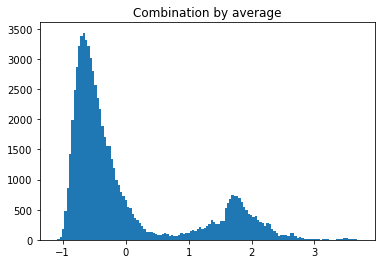

In [36]:
# Combination by average
y_by_average = average(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_average, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

It appears we can identify those >=3.0 as the outliers.

Step 3 — Get the Summary Statistics by Cluster


The follow code and results show the summary statistics of Cluster ‘1’ (the abnormal cluster) is different from those of Cluster ‘0’ (the normal cluster). The observations in Cluster 1 are outliers.

In [37]:
df_test = X_test.copy()
df_test['y_by_average_score'] = y_by_average
df_test['y_by_average_cluster'] = np.where(df_test['y_by_average_score']<2, 0, 1)
df_test['y_by_average_cluster'].value_counts()

df_test.groupby('y_by_average_cluster').mean().round(2)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,y_by_average_score
y_by_average_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.08,0.06,0.07,0.06,0.08,0.09,0.12,0.12,0.10,0.11,...,-0.02,0.02,0.01,0.00,0.01,0.05,0.03,0.07,0.04,-0.15
1,-1.34,-1.06,-1.20,-0.96,-1.30,-1.54,-2.00,-1.96,-1.58,-1.86,...,0.45,-0.29,-0.25,-0.08,-0.20,-0.84,-0.48,-1.07,-0.55,2.32


#### Maximum of Maximum Method
Before you become bored of the repetitions, let me produce one more.

Step 2 — Determine the cut point

Get the outlier scores from multiple models by taking the maximum. Similarly, it appears we can identify those >=3.0 as the outliers.

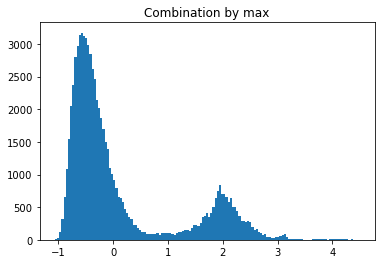

In [38]:
# Combination by max
y_by_maximization = maximization(test_scores_norm)
             
import matplotlib.pyplot as plt
plt.hist(y_by_maximization, bins='auto')  # arguments are passed to np.histogram
plt.title("Combination by max")
plt.show()

Step 3 — Get the Summary Statistics by Cluster

In [39]:

df_test = X_test.copy()
df_test['y_by_maximization_score'] = y_by_maximization
df_test['y_by_maximization_cluster'] = np.where(df_test['y_by_maximization_score']<2, 0, 1)
df_test['y_by_maximization_cluster'].value_counts()

df_test.groupby('y_by_maximization_cluster').mean().round(2)

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,y_by_maximization_score
y_by_maximization_cluster,,,,,,,,,,,,,,,,,,,,,
0,0.10,0.08,0.08,0.06,0.10,0.11,0.15,0.14,0.12,0.13,...,-0.03,0.03,0.02,0.01,0.02,0.09,0.04,0.08,0.05,-0.14
1,-0.81,-0.70,-0.66,-0.51,-0.84,-0.93,-1.27,-1.13,-0.94,-1.11,...,0.25,-0.24,-0.19,-0.12,-0.17,-0.72,-0.36,-0.64,-0.41,2.37
